## **Import**

In [1]:
import pandas as pd
import seaborn as sns
#import xgboost
import shap
shap.initjs()
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import dash
#import dash_bootstrap_components as dbc
import graphviz
import pygraphviz

from explainerdashboard import *
from explainerdashboard.custom import *
#from xgboost import XGBClassifier
#from dash import html

from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import  accuracy_score
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [2]:
data = pd.read_csv("sdab_data.csv", na_values='?')

In [3]:
data.head(2)

,id,name,seq,tm,doi,source,fr1,cdr1,fr2,cdr2,fr3,cdr3,fr4,target1,target2,target3,target4
0,>sdab1,NRL-N-C2,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,67.5,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN
1,>sdab2,NRL-N-C2-hop,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,65.0,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN


In [4]:
data['id'] = data['id'].str.replace('>', '', regex=False)

In [5]:
data.set_index('id', inplace=True)

In [6]:
data.head(2)

,name,seq,tm,doi,source,fr1,cdr1,fr2,cdr2,fr3,cdr3,fr4,target1,target2,target3,target4
id,,,,,,,,,,,,,,,,
sdab1,NRL-N-C2,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,67.5,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN
sdab2,NRL-N-C2-hop,EVQLQASGGGLVRPGGSLRLSCAASGFTFSSYAMMWVRQAPGKGLE...,65.0,https://pubs.acs.org/doi/10.1021/acs.analchem....,Llama,EVQLQASGGGLVRPGGSLRLSC,AASGFTFSSYAMM,WVRQAPGKGLEWV,SAINGGGGST,SYADSVKGRFTISRDNAKNTLYLQMNSLKPEDTAVYYC,AKYQAAVHQEKEDY,WGQGTQVTVSS,SARS-CoV-2 nucleocapsid (N),NaN,NaN,NaN


## **Data Analysis**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, sdab1 to sdab567
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     567 non-null    object 
 1   seq      567 non-null    object 
 2   tm       567 non-null    float64
 3   doi      567 non-null    object 
 4   source   534 non-null    object 
 5   fr1      567 non-null    object 
 6   cdr1     567 non-null    object 
 7   fr2      567 non-null    object 
 8   cdr2     567 non-null    object 
 9   fr3      567 non-null    object 
 10  cdr3     567 non-null    object 
 11  fr4      567 non-null    object 
 12  target1  438 non-null    object 
 13  target2  9 non-null      object 
 14  target3  9 non-null      object 
 15  target4  9 non-null      object 
dtypes: float64(1), object(15)
memory usage: 75.3+ KB


In [8]:
df=data.drop(['target2', 'target3', 'target4'], axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, sdab1 to sdab567
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     567 non-null    object 
 1   seq      567 non-null    object 
 2   tm       567 non-null    float64
 3   doi      567 non-null    object 
 4   source   534 non-null    object 
 5   fr1      567 non-null    object 
 6   cdr1     567 non-null    object 
 7   fr2      567 non-null    object 
 8   cdr2     567 non-null    object 
 9   fr3      567 non-null    object 
 10  cdr3     567 non-null    object 
 11  fr4      567 non-null    object 
 12  target1  438 non-null    object 
dtypes: float64(1), object(12)
memory usage: 62.0+ KB


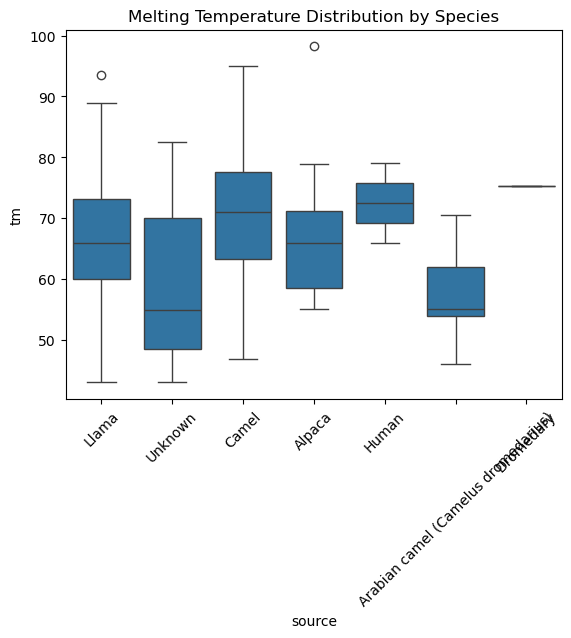

In [10]:
sns.boxplot(x='source', y='tm', data=df)
plt.title('Melting Temperature Distribution by Species')
plt.xticks(rotation=45) 
plt.show()

In [11]:
df[['base_name', 'mutation']] = df['name'].str.split('[-/:()]+', n = 1, expand=True)

Names of some amino acids (changed to unknown):   
    ÃÂÃÂ°  
    ÃÂ¡Ã‘Â

In [12]:
# Clean specific odd characters from your 'mutation' or other relevant columns
df['mutation'] = df['mutation'].replace({'ÃÂÃÂ°': 'Unknown', 'ÃÂ¡Ã‘Â': 'Unknown'}, regex=True)

# You can also check for more strange characters across the dataset
df = df.apply(lambda x: x.str.replace(r'[^\x00-\x7F]+', '', regex=True) if x.dtype == "object" else x)

In [13]:
df_without_mutations = df[df['mutation'].isna()]
df_with_mutations = df[df['mutation'].notna()]

In [14]:
df_without_mutations.to_csv('amino_acids_without_mutations.csv', index=False)
df_with_mutations.to_csv('mutations.csv', index=False)

In [15]:
polar_amino_acids = ['S', 'T', 'N', 'Q']
basic_amino_acids = ['K', 'R', 'H'],
#df_with_mutations.loc[:, 'first_is_polar'] = df_with_mutations['mutation'].str[0].isin(polar_amino_acids)

In [21]:
 # Filter the DataFrame based on specific protein names
proteins_to_extract = [
    'A26.8:T103R', 'A26.8:T56R', 'A26.8:Q101K', 'A26.8:T103K', 
    'A26.8:T54R', 'A26.8:T58K', 'A26.8:N109R', 'A26.8:T56R_Q101K_T103R', 
    'A26.8:T56R_T103R', 'A26.8:T56R_Q101K_T103M', 'A26.8:T56R_Q101K_T103K', 
    'A26.8:T56R_T103K', 'A26.8:T56R_Q101K', 'A26.8:Q101K_T103R', 
    'A26.8:T56R_T103M', 'A26.8:Q101K_T103M', 'A26.8:Q101K_T103K', 
    'Z18-S133R', 'Z18-R50L/G78A/S133R', 'Z18-G32D/R50L/G78A/S133R'
]

# Assuming the protein names are in a column 'protein_name'
df_filtered = df[df['name'].isin(proteins_to_extract)]

# Display the filtered DataFrame
#df_filtered

In [28]:
base_name_counts = df_with_mutations['base_name'].value_counts()
#base_name_counts

In [29]:
base_names_gt_5 = base_name_counts[base_name_counts > 5].index.tolist()
#base_names_gt_5

In [30]:
test = df_with_mutations[df_with_mutations['base_name'].isin(base_names_gt_5)]
#test

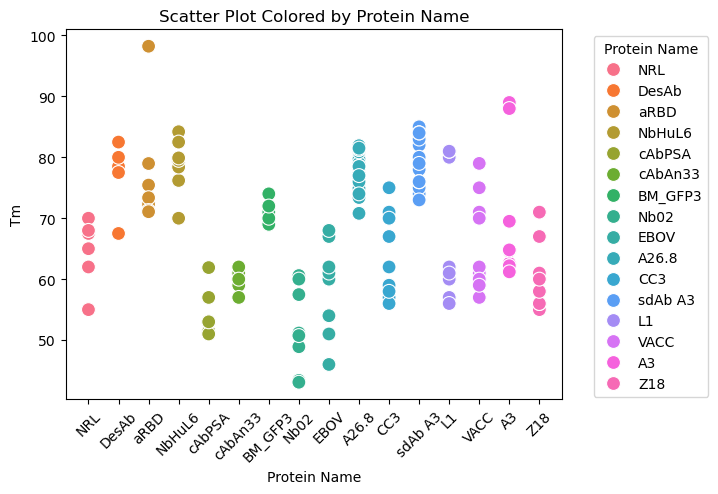

In [31]:
#plt.figure(figsize=(8,6))
sns.scatterplot(x='base_name', y='tm', hue='base_name', data=test, s=100)
plt.title('Scatter Plot Colored by Protein Name')
plt.xlabel('Protein Name')
plt.xticks(rotation=45) 
plt.ylabel('Tm')
plt.legend(title='Protein Name with Mutation')
plt.legend(title='Protein Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [32]:
protein_a26 = df_with_mutations[df_with_mutations['base_name'] == 'A26.8']
#protein_a26.head(2)

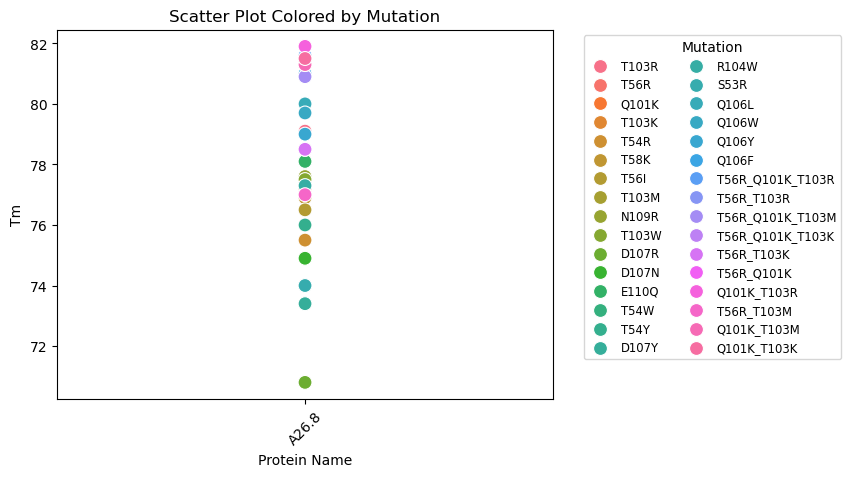

In [33]:
sns.scatterplot(x='base_name', y='tm', hue='mutation', data=protein_a26, s=100)
plt.title('Scatter Plot Colored by Mutation')
plt.xlabel('Protein Name')
plt.xticks(rotation=45) 
plt.ylabel('Tm')
plt.legend(title='Mutation', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.show()

In [34]:
mutation_counts = df['mutation'].value_counts()
mutation_counts

mutation
ds       6
0-0      4
H3       4
H4       4
H2       4
        ..
M0       1
M1       1
M2       1
M3       1
D107R    1
Name: count, Length: 192, dtype: int64

In [35]:
mutations_gt_3 = mutation_counts[mutation_counts > 3].index.tolist()
mutations_test = df_with_mutations[df_with_mutations['mutation'].isin(mutations_gt_3)]

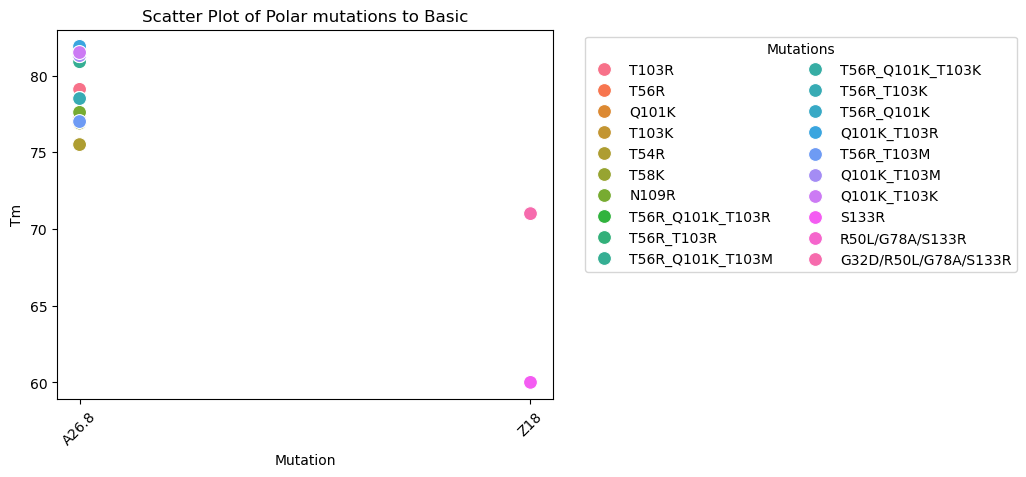

In [25]:
sns.scatterplot(x='base_name', y='tm', hue='mutation', data=df_filtered, s=100)
plt.title('Scatter Plot of Polar mutations to Basic')
plt.xlabel('Mutation')
plt.xticks(rotation=45) 
plt.ylabel('Tm')
plt.legend(title='Protein Name with Mutation')
plt.legend(title='Mutations', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

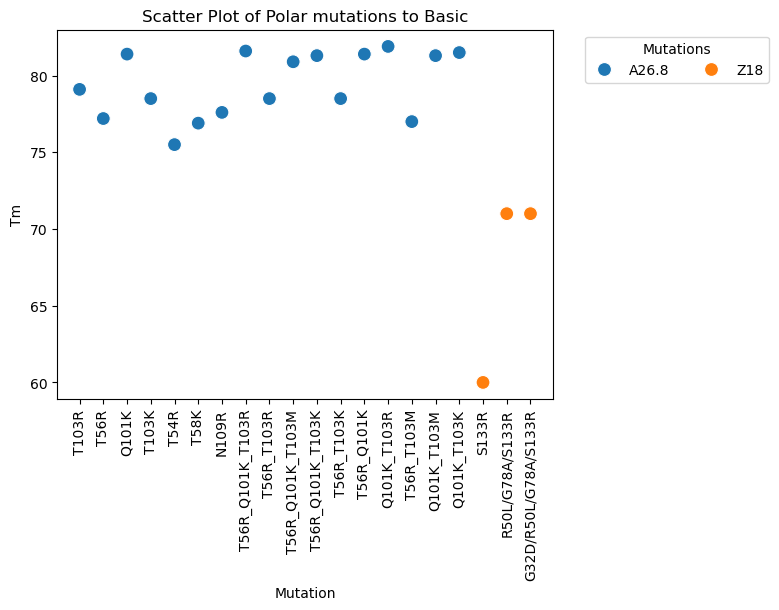

In [40]:
sns.scatterplot(x='mutation', y='tm', hue='base_name', data=df_filtered, s=100)
plt.title('Scatter Plot of Polar mutations to Basic')
plt.xlabel('Mutation')
plt.xticks(rotation=90) 
plt.ylabel('Tm')
plt.legend(title='Protein Name with Mutation')
plt.legend(title='Mutations', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()